In [14]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder

In [15]:
CSV_PATH="merged.csv"
database=pd.read_csv(CSV_PATH)
random_seed=47

In [16]:
database

,id,author,context,additional_context,song_title,song_text,author_id,source
0,1,Петре М,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,40.0,song_kafe_kniga
1,2,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,23.0,song_kafe_kniga
2,3,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,32.0,song_kafe_kniga
3,4,Влада Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,4.0,song_kafe_kniga
4,5,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,23.0,song_kafe_kniga
...,...,...,...,...,...,...,...,...
1221,1223,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,NaN,СРЕДЕ
1222,1224,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,NaN,СРЕДЕ
1223,1225,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,NaN,СРЕДЕ
1224,1226,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,NaN,СРЕДЕ


In [17]:
database=database.drop(columns='id')
database=database.drop(columns='author_id')

In [18]:
database

,author,context,additional_context,song_title,song_text,source
0,Петре М,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Влада Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1221,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1222,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1223,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1224,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


In [ ]:

author_map = {
    "Петре М": "Петре М. Андреевски",
    "Петре М.": "Петре М. Андреевски",
    "Петре М Андреевски": "Петре М. Андреевски",
    "Petre M": "Петре М. Андреевски",  
    "БОГОМИЛ ЃУЗЕЛ": "Богомил Ѓузел",
    "Богомил Ѓузел": "Богомил Ѓузел",

    "СЛАВКО  ЈАНЕВСКИ": "Славко Јаневски",
    "Славко Јаневски": "Славко Јаневски",

    "Никола Јонков Вапцаров": "Никола Вапцаров",
    "Никола Вапцаров": "Никола Вапцаров",

    "Влада Урошевиќ": "Владо Урошевиќ", 
    "Владо Урошевиќ": "Владо Урошевиќ",

    "Гане Тородовски": "Гане Тодоровски",  
    "Гане Тодоровски": "Гане Тодоровски",
}


database["author"] = database["author"].replace(author_map)

print(sorted(database["author"].unique()))

database.to_csv("merged_clean.csv", index=False)


['Јован Котески', 'Јосип Коцев', 'Адам Гајтани', 'Анте Поповски', 'Ацо Караманов', 'Ацо Шопов', 'Блаже Конески', 'Богомил Ѓузел', 'Бранко Цветкоски', 'Братислав Ташковски', 'Ванчо Николески', 'Веле Смилевски', 'Видое Подгорец', 'Владо Урошевиќ', 'Гане Тодоровски', 'Гого Ивановски', 'Ефтим Клетников', 'Игор Исаковски', 'Катица Ќулавкова', 'Коле Неделковски', 'Константин Миладинов', 'Кочо Рацин', 'Лилјана Дирјан', 'Матеја Матевски', 'Милош Линдро', 'Никола Вапцаров', 'Никола Маџиров', 'Петре М. Андреевски', 'Пијан Славеј', 'Раде Силјан', 'Радован Павловски', 'Рајко Жинзифов', 'Ристо Лазаров', 'Славко Јаневски', 'Тихомир Јанчовски', 'Тодор Чаловски', 'Цане Андреевски']


author
Блаже Конески           196
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           63
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Петре М. Андреевски      51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Константин Миладинов      4
Коле Неделковски          4
Тихомир Јанчовски         4
Видое Подгорец            3
Раде Силјан               3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Рајко Жинзифов            1
Никола Маџиров            1
Јован Котески             1
Радован Павло

/tmp/ipykernel_171289/4164383673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


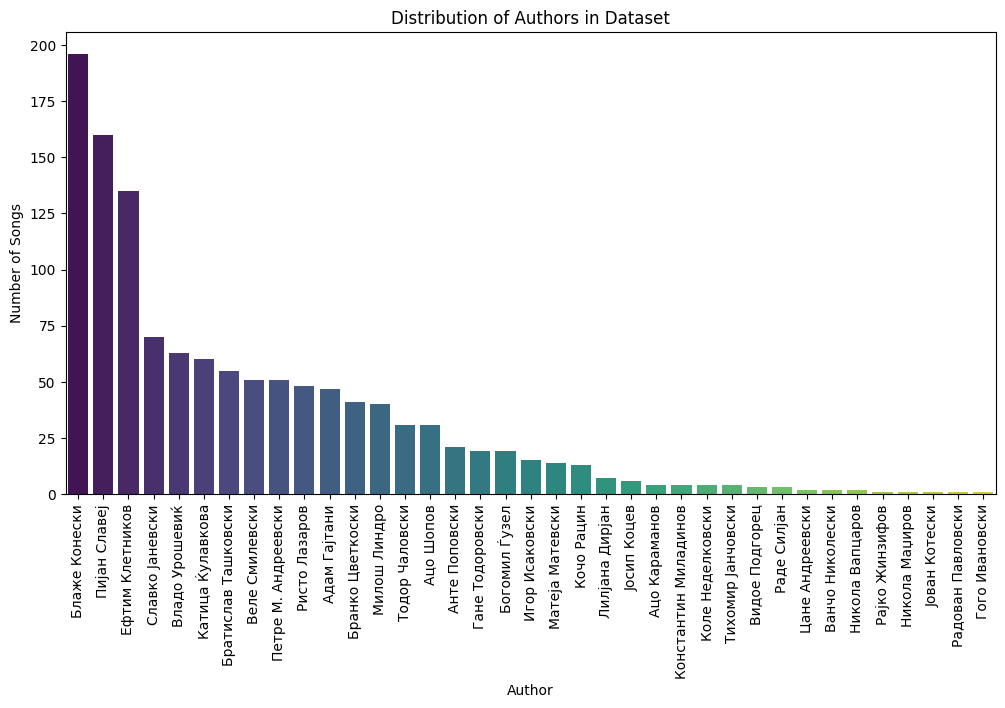

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


author_counts = database["author"].value_counts()

print(author_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Songs")
plt.title("Distribution of Authors in Dataset")
plt.show()


In [21]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


only_song = ['author', 'context']
train, test = train_test_split(database, test_size=0.3, random_state=random_seed)
train_x, train_y = train.drop(columns=only_song), train['author']
test_x, test_y = test.drop(columns=only_song), test['author']

train_texts = train_x["song_text"].astype(str)
test_texts = test_x["song_text"].astype(str)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)


def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 10)
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    epochs = trial.suggest_int("epochs", 5, 50) 

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation="softmax"))

    if optimizer_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

   
    history = model.fit(
        X_train, train_y_encoded,
        validation_data=(X_test, test_y_encoded),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    f1 = f1_score(test_y_encoded, y_pred, average="weighted")
    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-18 12:42:32.560905: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-18 12:42:32.590762: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: 

Best F1 Score: 0.7115201508098123
Best hyperparameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.480277251582165, 'optimizer': 'adam', 'lr': 0.007411508775215715, 'epochs': 26}


Epoch 1/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2762 - loss: 2.7292 - val_accuracy: 0.5082 - val_loss: 2.1502
Epoch 2/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8112 - loss: 1.1851 - val_accuracy: 0.6749 - val_loss: 1.5147
Epoch 3/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9720 - loss: 0.3360 - val_accuracy: 0.7022 - val_loss: 1.2262
Epoch 4/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0906 - val_accuracy: 0.7131 - val_loss: 1.1316
Epoch 5/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0309 - val_accuracy: 0.7049 - val_loss: 1.1014
Epoch 6/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0136 - val_accuracy: 0.7049 - val_loss: 1.0846
Epoch 7/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0086 - val_accuracy: 0.7131 - val_loss: 1.0662
Epoch 8/26
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.6967 - val_loss:

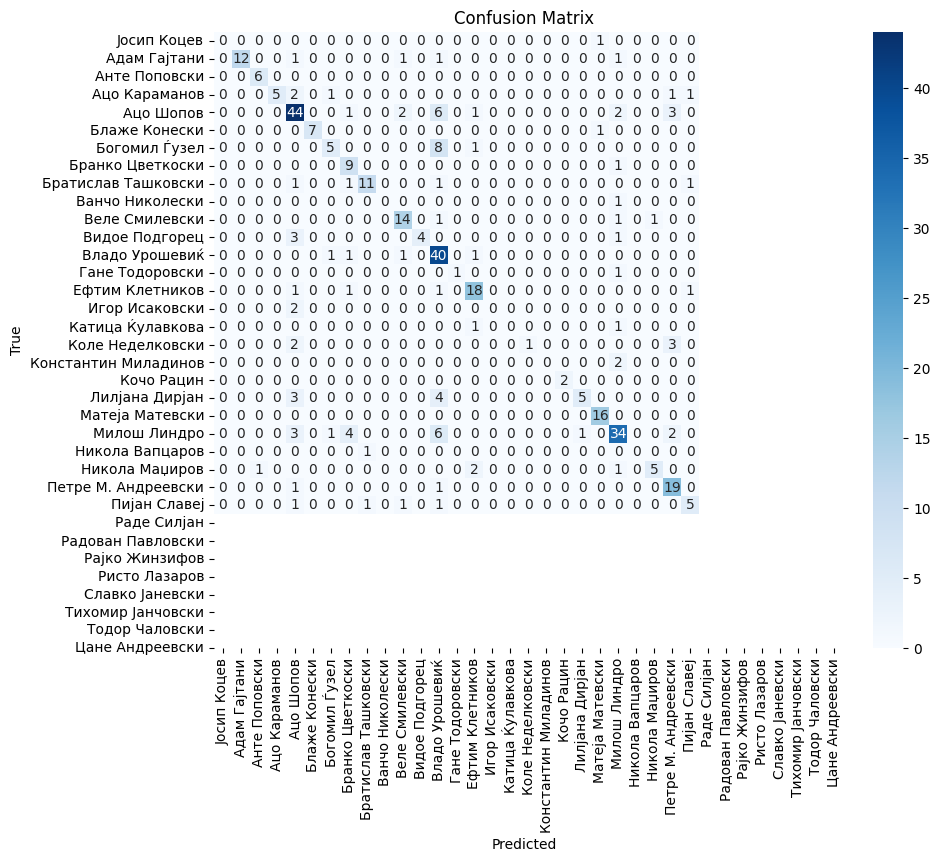

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


only_song = ['author', 'context']
train, test = train_test_split(database, test_size=0.3, random_state=random_seed)
train_x, train_y = train.drop(columns=only_song), train['author']
test_x, test_y = test.drop(columns=only_song), test['author']

train_texts = train_x["song_text"].astype(str)
test_texts = test_x["song_text"].astype(str)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)

n_layers = 1
neurons = 256
activation = "tanh"
dropout_rate =0.480277251582165
optimizer_name = "adam"
lr =  0.007411508775215715
epochs = 26

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

for _ in range(n_layers):
    model.add(layers.Dense(neurons, activation=activation))

model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation="softmax"))


optimizer = keras.optimizers.RMSprop(learning_rate=lr)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=epochs,
    batch_size=32,
    verbose=1
)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average="weighted")
print(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import f1_score, classification_report, precision_recall_fscore_support

def build_model(input_dim, num_classes, n_layers, neurons, activation, dropout_rate, lr):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation))
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
    return model

def objective(trial):
    # constrained search space
    n_layers = trial.suggest_int("n_layers", 1, 3)
    neurons = trial.suggest_categorical("neurons", [64, 128, 256])
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    epochs = 30  # use early stopping

    model = build_model(X_train.shape[1], num_classes, n_layers, neurons, activation, dropout_rate, lr)

    callbacks = [
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ]

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    y_prob = model.predict(X_val, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

    # compute F1 variants
    f1_macro = f1_score(y_val, y_pred, average='macro')
    f1_weighted = f1_score(y_val, y_pred, average='weighted')
    f1_micro = f1_score(y_val, y_pred, average='micro')

    # store extras in the trial for inspection later
    trial.set_user_attr("f1_weighted", float(f1_weighted))
    trial.set_user_attr("f1_micro", float(f1_micro))

    # Optuna will maximize the returned value (macro F1)
    return float(f1_macro)

# Run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

print("Best macro-F1 (val):", study.best_value)
print("Best params:", study.best_params)

# ----------------- Train final model on train+val and evaluate on test -----------------
# Combine train+val
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])

params = study.best_params
final_model = build_model(X_train_full.shape[1], num_classes,
                          n_layers=params['n_layers'],
                          neurons=params['neurons'],
                          activation=params['activation'],
                          dropout_rate=params['dropout_rate'],
                          lr=params['lr'])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]
final_model.fit(X_train_full, y_train_full,
                validation_split=0.1,
                epochs=60,
                batch_size=params.get('batch_size', 32),
                class_weight=class_weight_dict,
                callbacks=callbacks,
                verbose=1)

# Predict on test and compute F1s
y_test_prob = final_model.predict(X_test, verbose=0)
y_test_pred = np.argmax(y_test_prob, axis=1)

f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
f1_weighted_test = f1_score(y_test, y_test_pred, average='weighted')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')

print(f"Test F1 scores -> macro: {f1_macro_test:.4f}, weighted: {f1_weighted_test:.4f}, micro: {f1_micro_test:.4f}\n")

# Detailed per-class report
print("Per-class classification report (on test):")
print(classification_report(y_test, y_test_pred, target_names=le.classes_, digits=4))

# Optionally: get per-class f1 array if you want programmatic access
prec, recall, f1_per_class, support = precision_recall_fscore_support(y_test, y_test_pred, labels=range(num_classes))
per_class_df = pd.DataFrame({
    "author": le.classes_,
    "precision": prec,
    "recall": recall,
    "f1": f1_per_class,
    "support": support
})
print("\nPer-class F1 summary (sorted by support):")
print(per_class_df.sort_values("support", ascending=False).head(30))


[I 2025-09-18 13:23:18,400] A new study created in memory with name: no-name-c6d1080a-e0ea-4bc6-b774-438e37af8ea9
Best trial: 0. Best value: 0.310352:   2%|▎         | 1/40 [00:03<02:05,  3.21s/it]

[I 2025-09-18 13:23:21,615] Trial 0 finished with value: 0.3103518703518703 and parameters: {'n_layers': 2, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.0031786096944516617, 'lr': 4.793023370090916e-05, 'batch_size': 128}. Best is trial 0 with value: 0.3103518703518703.


Best trial: 0. Best value: 0.310352:   5%|▌         | 2/40 [00:04<01:25,  2.25s/it]

[I 2025-09-18 13:23:23,188] Trial 1 finished with value: 0.014561855670103093 and parameters: {'n_layers': 3, 'neurons': 128, 'activation': 'relu', 'dropout_rate': 0.11320234538993673, 'lr': 0.00010555324210212445, 'batch_size': 128}. Best is trial 0 with value: 0.3103518703518703.


Best trial: 2. Best value: 0.661429:   8%|▊         | 3/40 [00:09<02:06,  3.42s/it]

[I 2025-09-18 13:23:28,008] Trial 2 finished with value: 0.6614289767250294 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.47605842604197995, 'lr': 0.0004565495287542273, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  10%|█         | 4/40 [00:11<01:39,  2.75s/it]

[I 2025-09-18 13:23:29,734] Trial 3 finished with value: 0.004310344827586207 and parameters: {'n_layers': 3, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.10981732275057693, 'lr': 1.2183562546115073e-05, 'batch_size': 64}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  12%|█▎        | 5/40 [00:16<02:12,  3.80s/it]

[I 2025-09-18 13:23:35,377] Trial 4 finished with value: 0.22289872116187906 and parameters: {'n_layers': 3, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.01365150886112615, 'lr': 1.0489271094234134e-05, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  15%|█▌        | 6/40 [00:20<02:04,  3.65s/it]

[I 2025-09-18 13:23:38,743] Trial 5 finished with value: 0.4197748216695585 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'tanh', 'dropout_rate': 0.42963220032554567, 'lr': 0.00019754479660519017, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  18%|█▊        | 7/40 [00:23<02:00,  3.65s/it]

[I 2025-09-18 13:23:42,382] Trial 6 finished with value: 0.5969644244644244 and parameters: {'n_layers': 3, 'neurons': 64, 'activation': 'tanh', 'dropout_rate': 0.47212852594600496, 'lr': 0.0007689333490433428, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  20%|██        | 8/40 [00:26<01:47,  3.35s/it]

[I 2025-09-18 13:23:45,095] Trial 7 finished with value: 0.47625405000405 and parameters: {'n_layers': 1, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.32849281075124676, 'lr': 0.00010616938118306472, 'batch_size': 64}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  22%|██▎       | 9/40 [00:28<01:27,  2.83s/it]

[I 2025-09-18 13:23:46,786] Trial 8 finished with value: 0.006201550387596899 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'relu', 'dropout_rate': 0.2714879122503935, 'lr': 3.0397852682340744e-05, 'batch_size': 128}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  25%|██▌       | 10/40 [00:31<01:28,  2.95s/it]

[I 2025-09-18 13:23:50,007] Trial 9 finished with value: 0.16926932944521286 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'relu', 'dropout_rate': 0.4595626232794739, 'lr': 5.2132460110793915e-05, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  28%|██▊       | 11/40 [00:36<01:38,  3.41s/it]

[I 2025-09-18 13:23:54,453] Trial 10 finished with value: 0.651365772689302 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.36692248897521135, 'lr': 0.0009461931438658351, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  30%|███       | 12/40 [00:40<01:44,  3.73s/it]

[I 2025-09-18 13:23:58,924] Trial 11 finished with value: 0.6550343773873185 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.34903841319690043, 'lr': 0.0009499582175772226, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  32%|███▎      | 13/40 [00:44<01:46,  3.94s/it]

[I 2025-09-18 13:24:03,339] Trial 12 finished with value: 0.6153163812451738 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3910729061599516, 'lr': 0.0003587031483624152, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  35%|███▌      | 14/40 [00:49<01:46,  4.10s/it]

[I 2025-09-18 13:24:07,797] Trial 13 finished with value: 0.621264170869434 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.2772889090302643, 'lr': 0.0004120518907862472, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  38%|███▊      | 15/40 [00:53<01:45,  4.22s/it]

[I 2025-09-18 13:24:12,311] Trial 14 finished with value: 0.5956054899437252 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.49700115782245313, 'lr': 0.0004521880583620888, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  40%|████      | 16/40 [00:57<01:35,  3.97s/it]

[I 2025-09-18 13:24:15,693] Trial 15 finished with value: 0.6173909311104433 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.194113204771199, 'lr': 0.00021060398958228338, 'batch_size': 64}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  42%|████▎     | 17/40 [01:01<01:34,  4.12s/it]

[I 2025-09-18 13:24:20,158] Trial 16 finished with value: 0.6376717971570912 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3438071898796813, 'lr': 0.0006938493348401204, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  45%|████▌     | 18/40 [01:06<01:36,  4.41s/it]

[I 2025-09-18 13:24:25,236] Trial 17 finished with value: 0.5510856197064729 and parameters: {'n_layers': 2, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.40846825328130815, 'lr': 0.00025248820407682563, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  48%|████▊     | 19/40 [01:09<01:22,  3.92s/it]

[I 2025-09-18 13:24:28,033] Trial 18 finished with value: 0.5075092623235038 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.22555158501420128, 'lr': 0.0005947530833389115, 'batch_size': 128}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  50%|█████     | 20/40 [01:12<01:13,  3.69s/it]

[I 2025-09-18 13:24:31,181] Trial 19 finished with value: 0.5233576369866693 and parameters: {'n_layers': 2, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.3209085161082059, 'lr': 0.00031603269705837397, 'batch_size': 64}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 2. Best value: 0.661429:  52%|█████▎    | 21/40 [01:17<01:14,  3.91s/it]

[I 2025-09-18 13:24:35,603] Trial 20 finished with value: 0.6299799530564449 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.43425651736917914, 'lr': 0.0009278376207768225, 'batch_size': 32}. Best is trial 2 with value: 0.6614289767250294.


Best trial: 21. Best value: 0.703204:  55%|█████▌    | 22/40 [01:22<01:15,  4.19s/it]

[I 2025-09-18 13:24:40,452] Trial 21 finished with value: 0.7032041107041107 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3623114428529555, 'lr': 0.0009618213163175274, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  57%|█████▊    | 23/40 [01:27<01:15,  4.46s/it]

[I 2025-09-18 13:24:45,530] Trial 22 finished with value: 0.6724327329590487 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3774091811315195, 'lr': 0.0005864635673447127, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  60%|██████    | 24/40 [01:31<01:11,  4.49s/it]

[I 2025-09-18 13:24:50,105] Trial 23 finished with value: 0.6551342809237546 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3856592501580106, 'lr': 0.0005917687533020146, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  62%|██████▎   | 25/40 [01:37<01:11,  4.77s/it]

[I 2025-09-18 13:24:55,506] Trial 24 finished with value: 0.6122934822629944 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.4994766275619459, 'lr': 0.00015370580020249202, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  65%|██████▌   | 26/40 [01:41<01:05,  4.66s/it]

[I 2025-09-18 13:24:59,931] Trial 25 finished with value: 0.6030073097187701 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.29934556071842283, 'lr': 0.0005004248135721134, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  68%|██████▊   | 27/40 [01:43<00:49,  3.82s/it]

[I 2025-09-18 13:25:01,774] Trial 26 finished with value: 0.003875968992248062 and parameters: {'n_layers': 2, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.4479362147677309, 'lr': 0.0002807176008739098, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  70%|███████   | 28/40 [01:47<00:47,  3.99s/it]

[I 2025-09-18 13:25:06,183] Trial 27 finished with value: 0.5988165266106441 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.4124324656408213, 'lr': 0.0005178072567848356, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  72%|███████▎  | 29/40 [01:50<00:39,  3.57s/it]

[I 2025-09-18 13:25:08,752] Trial 28 finished with value: 0.40666472416472416 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'tanh', 'dropout_rate': 0.24269764978070063, 'lr': 0.00015593902689350523, 'batch_size': 128}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  75%|███████▌  | 30/40 [01:53<00:34,  3.45s/it]

[I 2025-09-18 13:25:11,915] Trial 29 finished with value: 0.38068677509853976 and parameters: {'n_layers': 2, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.37660590183718223, 'lr': 5.60653335228985e-05, 'batch_size': 64}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  78%|███████▊  | 31/40 [01:55<00:28,  3.13s/it]

[I 2025-09-18 13:25:14,323] Trial 30 finished with value: 0.24909798534798533 and parameters: {'n_layers': 1, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.4714093509243049, 'lr': 3.045160642425109e-05, 'batch_size': 128}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  80%|████████  | 32/40 [02:00<00:28,  3.62s/it]

[I 2025-09-18 13:25:19,090] Trial 31 finished with value: 0.6308853908853909 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.38956739936779666, 'lr': 0.000596227689535124, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  82%|████████▎ | 33/40 [02:05<00:26,  3.85s/it]

[I 2025-09-18 13:25:23,461] Trial 32 finished with value: 0.6215399074609601 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3125336984154708, 'lr': 0.0007290769732561616, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  85%|████████▌ | 34/40 [02:09<00:24,  4.00s/it]

[I 2025-09-18 13:25:27,822] Trial 33 finished with value: 0.6357732150415079 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3609496152627205, 'lr': 0.000404178246432081, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  88%|████████▊ | 35/40 [02:13<00:19,  3.99s/it]

[I 2025-09-18 13:25:31,777] Trial 34 finished with value: 0.6546409961851138 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.40336452613204765, 'lr': 0.0006176484230777442, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  90%|█████████ | 36/40 [02:17<00:15,  3.98s/it]

[I 2025-09-18 13:25:35,754] Trial 35 finished with value: 0.5765727573080514 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.1510376017094373, 'lr': 0.0003334131619762468, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  92%|█████████▎| 37/40 [02:21<00:12,  4.11s/it]

[I 2025-09-18 13:25:40,141] Trial 36 finished with value: 0.5951813091092029 and parameters: {'n_layers': 3, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.42887300921338734, 'lr': 0.0007662238193503421, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  95%|█████████▌| 38/40 [02:24<00:07,  3.62s/it]

[I 2025-09-18 13:25:42,620] Trial 37 finished with value: 0.4163813963813964 and parameters: {'n_layers': 1, 'neurons': 128, 'activation': 'tanh', 'dropout_rate': 0.040052165337363, 'lr': 7.251091971629651e-05, 'batch_size': 64}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204:  98%|█████████▊| 39/40 [02:25<00:03,  3.05s/it]

[I 2025-09-18 13:25:44,332] Trial 38 finished with value: 0.010218978102189781 and parameters: {'n_layers': 2, 'neurons': 64, 'activation': 'relu', 'dropout_rate': 0.2936962779994242, 'lr': 1.6807058075527464e-05, 'batch_size': 128}. Best is trial 21 with value: 0.7032041107041107.


Best trial: 21. Best value: 0.703204: 100%|██████████| 40/40 [02:29<00:00,  3.75s/it]

[I 2025-09-18 13:25:48,247] Trial 39 finished with value: 0.6592049661167309 and parameters: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.47463527144539475, 'lr': 0.00023263192827745847, 'batch_size': 32}. Best is trial 21 with value: 0.7032041107041107.
Best macro-F1 (val): 0.7032041107041107
Best params: {'n_layers': 1, 'neurons': 256, 'activation': 'tanh', 'dropout_rate': 0.3623114428529555, 'lr': 0.0009618213163175274, 'batch_size': 32}
Epoch 1/60


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3784 - val_loss: 2.8978
Epoch 2/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1376 - val_loss: 2.8180
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - val_loss: 2.7637
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - val_loss: 2.7189
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 2.6737
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 2.6240
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - val_loss: 2.5685
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 2.5057
Epoch 9/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 2.4367
Epoch 10/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 2.3606
Epoch 11/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 2.2765
Epoch 12/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 2.1856
